<a href="https://colab.research.google.com/github/muhammadmo/Computer_Vision_Crash_Course/blob/main/4.Basic%20image%20processing(Tensorflow)/Basic_image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
print(tf.__version__)

2.11.0


In [ ]:
#import mnist fashion dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_labels.shape

(60000,)

In [ ]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
first_image = train_images[0]
first_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

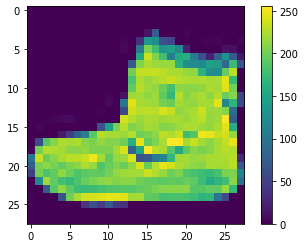

In [ ]:
plt.figure()
plt.imshow(first_image)
plt.colorbar()
plt.show()

TensorFlow Info......

In [ ]:
 train_images = train_images / 255
 test_images = test_images / 255 

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pulliver', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

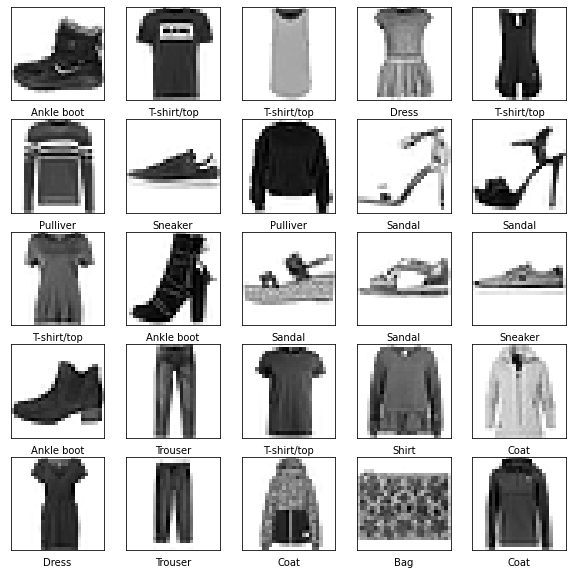

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

Neural Network info ...

In [ ]:
#create the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
#compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 3ms/step - loss: 0.5020 - accuracy: 0.8227
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3777 - accuracy: 0.8629
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3393 - accuracy: 0.8763
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3150 - accuracy: 0.8842
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2963 - accuracy: 0.8906
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2822 - accuracy: 0.8963
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2702 - accuracy: 0.8989
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2582 - accuracy: 0.9036
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2488 - accuracy: 0.9071
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.23

Prediction

In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3344 - accuracy: 0.8813


In [ ]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
predictions.shape

(10000, 10)

A prediction is an array of 10 numbers

In [ ]:
predictions[0]

array([5.8536429e-08, 2.0167171e-07, 1.4601453e-07, 1.4844424e-07,
       2.2403620e-07, 2.1993680e-04, 3.8368944e-07, 7.8595437e-02,
       5.6801747e-07, 9.2118287e-01], dtype=float32)

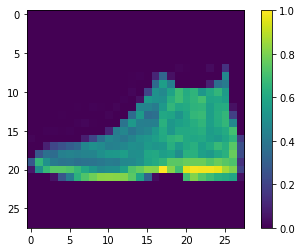

In [ ]:
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.show()

In [ ]:
# Evaluate the prediction results

#plot image
def plot_image(i, predictions_array, true_lable, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
                                       color = color)
  

#create bar plot
def plot_value_array(i, predictions_array, true_lable):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#7777777")
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

UnboundLocalError: ignored

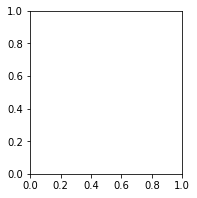

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

Text(0.5, 0, 'Ankle boot 92% (Ankle boot)')

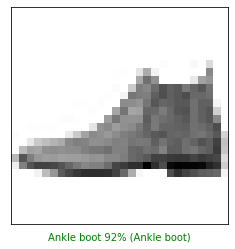

In [ ]:
  predictions_array, true_label, img = predictions[0], test_labels[0], test_images[0]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
                                       color = color)
  

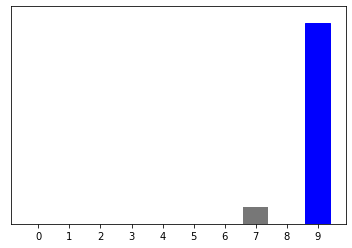

In [ ]:
  predictions_array, true_label = predictions[0], test_labels[0]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Text(0.5, 0, 'Sandal 66% (Sneaker)')

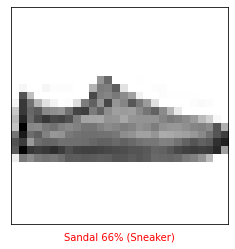

In [ ]:
  predictions_array, true_label, img = predictions[12], test_labels[12], test_images[12]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
                                       color = color)


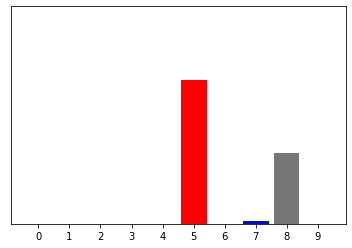

In [ ]:
predictions_array, true_label = predictions[12], test_labels[12]
plt.grid(False)
plt.xticks(range(10))
plt.yticks([])
thisplot = plt.bar(range(10), predictions_array, color="#777777")
plt.ylim([0,1])
predicted_label = np.argmax(predictions_array)

thisplot[predicted_label].set_color('red')
thisplot[true_label].set_color('blue')

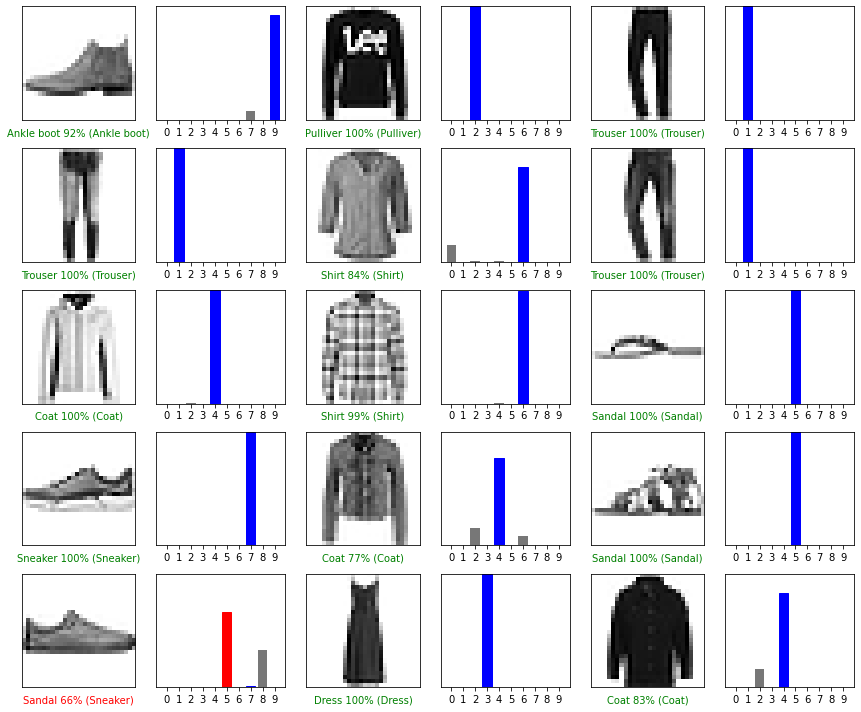

In [ ]:
#Evaluate the prediction results

rows = 5
cols = 3

num_images = rows * cols
plt.figure(figsize=(2*2*cols, 2*rows))

for i in range(num_images):
  plt.subplot(rows, 2*cols, 2*i+1)
  

  predictions_array, true_label, img = predictions[i], test_labels[i], test_images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
                                       color = color)
  
  plt.subplot(rows, 2*cols, 2*i+2)

  predictions_array, true_label = predictions[i], test_labels[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

plt.tight_layout()
plt.show()

In [ ]:
#Prediction on a single image

img = test_images[8]
img.shape

(28, 28)

In [ ]:
img = (np.expand_dims(img, 0))
img.shape

(1, 28, 28)

In [ ]:
my_prediction = model.predict(img)
my_prediction

1/1 [==============================] - 0s 25ms/step


array([[2.2867580e-05, 2.1432967e-07, 2.6186223e-07, 4.8238298e-09,
        5.9661973e-09, 9.9996817e-01, 1.5187622e-06, 1.1632767e-06,
        5.8167775e-06, 2.6696025e-09]], dtype=float32)

In [ ]:
plot_value_array(1, my_prediction[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

UnboundLocalError: ignored

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
#building CNN stracture
cnn = Sequential()
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(64, (3, 3), activation="relu"))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Flatten())
cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'relu', units = 64))
cnn.add(Dense(10,activation="softmax"))
cnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

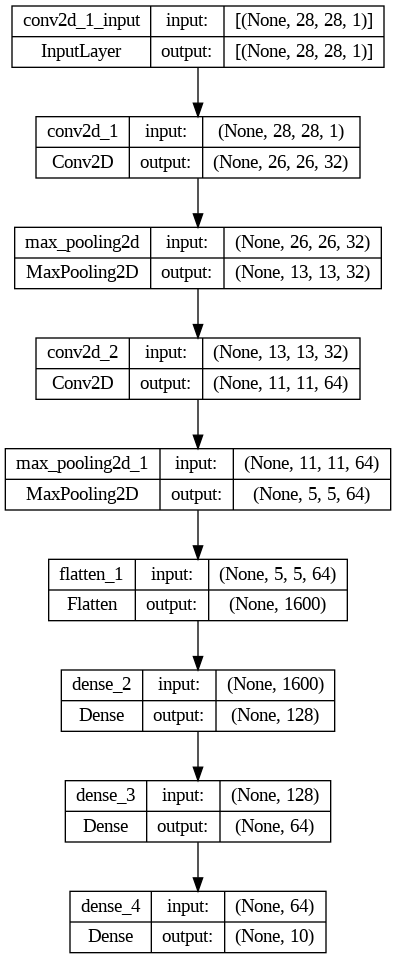

In [ ]:
#show model
from tensorflow.keras.utils import plot_model
plot_model(cnn,show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)

In [ ]:
#early stopping
early = EarlyStopping(monitor="val_loss", 
                      mode="min", 
                      patience=3)

learning_rate_reduction = ReduceLROnPlateau(monitor='accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

callbacks_list = [ early, learning_rate_reduction]

In [ ]:
history = cnn.fit(train,
                    batch_size=128,
                    epochs=20,
                    validation_data=valid)

In [ ]:
cnn.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 15s 4ms/step - loss: 0.4626 - accuracy: 0.8326
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2996 - accuracy: 0.8902
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2539 - accuracy: 0.9057
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2212 - accuracy: 0.9176
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1978 - accuracy: 0.9266
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1782 - accuracy: 0.9334
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1571 - accuracy: 0.9409
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1422 - accuracy: 0.9474
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1292 - accuracy: 0.9512
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1

In [ ]:
test_loss, test_accuracy = cnn.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.2911 - accuracy: 0.9035


In [ ]:
pd.DataFrame(cnn.history.history).plot()

NameError: ignored

In [ ]:
test_accu = cnn.evaluate(test_images, test_labels)
print('The testing accuracy is :',test_accu[1]*100, '%')

313/313 [==============================] - 1s 5ms/step - loss: 0.2911 - accuracy: 0.9035
The testing accuracy is : 90.35000205039978 %


In [ ]:
preds = cnn.predict(test_images,verbose=1)

313/313 [==============================] - 1s 2ms/step


In [ ]:
import numpy as np
rounded_labels=np.argmax(preds, axis=1)
rounded_labels[1]

2

In [ ]:
from sklearn.metrics import confusion_matrix
cmm = confusion_matrix(rounded_labels, test_labels)
cmm

array([[827,   2,  21,   5,   1,   0,  88,   0,   1,   1],
       [  1, 977,   0,   1,   0,   0,   1,   0,   1,   0],
       [  6,   0, 757,   5,  17,   0,  34,   0,   2,   1],
       [ 30,  12,   9, 922,  16,   0,  29,   0,   2,   0],
       [  6,   3, 119,  36, 917,   0,  73,   0,   5,   0],
       [  1,   0,   0,   0,   0, 978,   0,  12,   3,   5],
       [124,   4,  94,  29,  49,   0, 768,   0,   6,   0],
       [  0,   0,   0,   0,   0,  12,   0, 944,   2,  25],
       [  5,   2,   0,   2,   0,   1,   7,   0, 977,   0],
       [  0,   0,   0,   0,   0,   9,   0,  44,   1, 968]])

<AxesSubplot:>

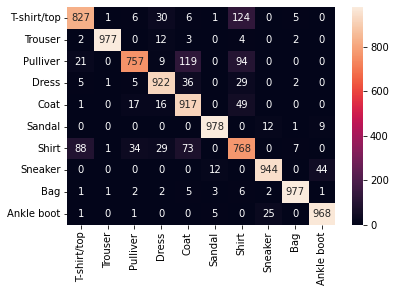

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
import pandas as pd
cm = pd.DataFrame(data=confusion_matrix(test_labels, rounded_labels, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),index=['T-shirt/top', 'Trouser', 'Pulliver', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'],
columns=['T-shirt/top', 'Trouser', 'Pulliver', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="d")

In [ ]:
print(classification_report(y_true=test_labels,y_pred=rounded_labels,target_names =['T-shirt/top', 'Trouser', 'Pulliver', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']))

              precision    recall  f1-score   support

 T-shirt/top       0.87      0.83      0.85      1000
     Trouser       1.00      0.98      0.99      1000
    Pulliver       0.92      0.76      0.83      1000
       Dress       0.90      0.92      0.91      1000
        Coat       0.79      0.92      0.85      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.72      0.77      0.74      1000
     Sneaker       0.96      0.94      0.95      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.95      0.97      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000

